# Titanic Spaceship Kaggle Competition 

# Import liabraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score


In [2]:
data=pd.read_csv(r"C:\Users\akshi\Downloads\train (1).csv")
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RoomService'}>],
       [<AxesSubplot:title={'center':'FoodCourt'}>,
        <AxesSubplot:title={'center':'ShoppingMall'}>],
       [<AxesSubplot:title={'center':'Spa'}>,
        <AxesSubplot:title={'center':'VRDeck'}>]], dtype=object)

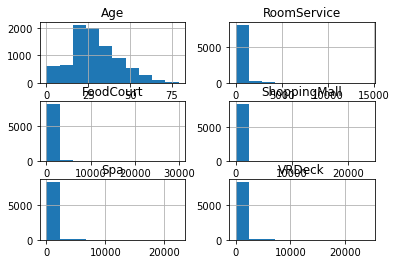

In [5]:
data.hist()

C:\Users\akshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Transported', ylabel='count'>

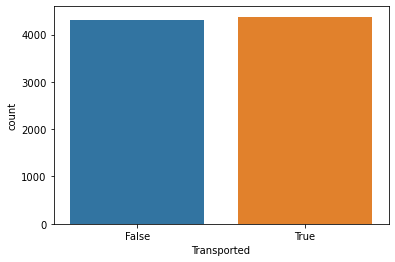

In [6]:
sns.countplot(data["Transported"])

# Feature extraction 

In [7]:
data=data.iloc[:,[2,3,5,6,7,10,11,13]]
data

,CryoSleep,Cabin,Age,VIP,RoomService,Spa,VRDeck,Transported
0,False,B/0/P,39.0,False,0.0,0.0,0.0,False
1,False,F/0/S,24.0,False,109.0,549.0,44.0,True
2,False,A/0/S,58.0,True,43.0,6715.0,49.0,False
3,False,A/0/S,33.0,False,0.0,3329.0,193.0,False
4,False,F/1/S,16.0,False,303.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...
8688,False,A/98/P,41.0,True,0.0,1643.0,74.0,False
8689,True,G/1499/S,18.0,False,0.0,0.0,0.0,False
8690,False,G/1500/S,26.0,False,0.0,1.0,0.0,True
8691,False,E/608/S,32.0,False,0.0,353.0,3235.0,False


# Label Encoding


In [8]:
from sklearn.preprocessing import LabelEncoder
l1=LabelEncoder()
data['CryoSleep']=l1.fit_transform(data['CryoSleep'])
data['Cabin']=l1.fit_transform(data['Cabin'])
data['VIP']=l1.fit_transform(data['VIP'])

<ipython-input-8-1ddcfe4c9393>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CryoSleep']=l1.fit_transform(data['CryoSleep'])
<ipython-input-8-1ddcfe4c9393>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cabin']=l1.fit_transform(data['Cabin'])
<ipython-input-8-1ddcfe4c9393>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [10]:
data.isnull().sum()

CryoSleep        0
Cabin            0
Age            179
VIP              0
RoomService    181
Spa            183
VRDeck         188
Transported      0
dtype: int64

In [11]:
#Fill the null value

In [12]:
data['CryoSleep'].fillna(data['CryoSleep'].mean(),inplace=True)


<ipython-input-12-cf629a3b20c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CryoSleep'].fillna(data['CryoSleep'].mean(),inplace=True)


In [13]:
data['Cabin'].fillna(data['Cabin'].mean(),inplace=True)


<ipython-input-13-aa0083f06da0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cabin'].fillna(data['Cabin'].mean(),inplace=True)


In [14]:
data['Age'].fillna(data['Age'].mean(),inplace=True)


<ipython-input-14-63b0e3ca4f44>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'].fillna(data['Age'].mean(),inplace=True)


In [15]:
data['VIP'].fillna(data['VIP'].mean(),inplace=True)


<ipython-input-15-e329beca5bff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['VIP'].fillna(data['VIP'].mean(),inplace=True)


In [16]:
data['RoomService'].fillna(data['RoomService'].mean(),inplace=True)


<ipython-input-16-6644615f42ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RoomService'].fillna(data['RoomService'].mean(),inplace=True)


In [17]:
data['Spa'].fillna(data['Spa'].mean(),inplace=True)


<ipython-input-17-ff997e1154d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Spa'].fillna(data['Spa'].mean(),inplace=True)


In [18]:
data['VRDeck'].fillna(data['VRDeck'].mean(),inplace=True)


<ipython-input-18-9071f8f98545>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['VRDeck'].fillna(data['VRDeck'].mean(),inplace=True)


In [19]:
data.isnull().sum()

CryoSleep      0
Cabin          0
Age            0
VIP            0
RoomService    0
Spa            0
VRDeck         0
Transported    0
dtype: int64

# Find  the Outliers 

In [21]:
for col in data.iloc[:,:-1].columns:
    if data.iloc[:,:-1][col].dtypes != 'object':
        q1 , q3 =data.iloc[:,:-1][col].quantile(0.25),data.iloc[:,:-1][col].quantile(0.75)
        iqr = q3 - q1
        ll = q1-1.5*iqr
        ul = q3 + 1.5*iqr
        # fill outliers by  mean .
        data["Age"] = np.where(data["Age"]>ul,data["Age"].mean(),np.where(data["Age"]<ll,data["Age"].mean(),data["Age"]))  
        data["VIP"] = np.where(data["VIP"]>ul,data["VIP"].mean(),np.where(data["VIP"]<ll,data["VIP"].mean(),data["VIP"]))  
        data["RoomService"] = np.where(data["RoomService"]>ul,data["RoomService"].mean(),np.where(data["RoomService"]<ll,data["RoomService"].mean(),data["RoomService"]))
        data["Cabin"] = np.where(data["Cabin"]>ul,data["Cabin"].mean(),np.where(data["Cabin"]<ll,data["Cabin"].mean(),data["Cabin"]))  
        data["Spa"] = np.where(data["Spa"]>ul,data["Spa"].mean(),np.where(data["Spa"]<ll,data["Spa"].mean(),data["Spa"]))
        data["VRDeck"] = np.where(data["VRDeck"]>ul,data["VRDeck"].mean(),np.where(data["VRDeck"]<ll,data["VRDeck"].mean(),data["VRDeck"]))

<ipython-input-21-c2af16c0405f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Age"] = np.where(data["Age"]>ul,data["Age"].mean(),np.where(data["Age"]<ll,data["Age"].mean(),data["Age"]))
<ipython-input-21-c2af16c0405f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["VIP"] = np.where(data["VIP"]>ul,data["VIP"].mean(),np.where(data["VIP"]<ll,data["VIP"].mean(),data["VIP"]))
<ipython-input-21-c2af16c0405f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [22]:
#Find the Outliers Count

In [23]:
Q1=data.iloc[:,:-1].quantile(0.25)
Q3=data.iloc[:,:-1].quantile(0.75)
IQR=Q3-Q1
IQR
print("outlier Counter of the all features")
((data.iloc[:,:-1] < (Q1 - 1.5 * IQR)) | (data.iloc[:,:-1]> (Q3 + 1.5 * IQR))).sum()


outlier Counter of the all features


CryoSleep      0
Cabin          0
Age            0
VIP            0
RoomService    0
Spa            0
VRDeck         0
dtype: int64

In [24]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [25]:
data['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

# Balancing Technique

In [26]:
from imblearn.under_sampling import NearMiss
n1=NearMiss()
x_data,y_data=n1.fit_resample(x,y)

In [27]:
data['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [28]:
#from collections import Counter
#print(Counter(y_data))

# Standerdisation (Feature Scaling)


In [29]:
from sklearn.preprocessing import StandardScaler
r=StandardScaler()
d=r.fit_transform(x)

In [30]:
from collections import Counter
print(Counter(y_data))

Counter({False: 4315, True: 4315})


# spliting the data

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(d,y,test_size=0.2,random_state=20)

In [32]:
from collections import Counter
print(Counter(y_test))

Counter({True: 900, False: 839})


In [33]:
# Cross validation .
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=5,random_state=20,shuffle=True)
skf.split(d,y_data)
print(skf)

StratifiedKFold(n_splits=5, random_state=20, shuffle=True)


# Logistic Regression 

In [34]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
l1=LogisticRegression()
l1.fit(x_train,y_train)
y_pred=l1.predict(x_test)
print("predicted value",y_pred)
y_score=accuracy_score(y_test,y_pred)*100
print("Accuracy",y_score)

predicted value [ True False False ... False  True  True]
Accuracy 71.8803910293272


# Random Forest


In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)


RandomForestClassifier()

In [36]:
rfc_pred=rfc.predict(x_test)
rfc_pred

array([ True, False, False, ..., False,  True,  True])

In [37]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_test,rfc_pred)*100

71.93789534215065

# Ensemble Technique


In [38]:
from sklearn.ensemble import VotingClassifier
vc=VotingClassifier(estimators=[("Random_Forest",rfc),("LogisticRegression",l1)])
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('Random_Forest', RandomForestClassifier()),
                             ('LogisticRegression', LogisticRegression())])

In [39]:
vc_pred=vc.predict(x_test)
vc_pred


array([ True, False, False, ..., False,  True,  True])

In [40]:
accuracy_score(y_test,vc_pred)*100


71.93789534215065

# My model given 71.94 % accuracy . 